In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
df = pd.read_csv('Amazon Sale Report.csv', encoding='unicode_escape')

In [6]:
df.shape

(128975, 11)

In [7]:
df.head()

,ï»¿Order ID,Date,Status,Fulfilment,SKU,Category,Size,Courier Status,Qty,Amount,ship-state
0,405-8078784-5731545,30-04-2022,Cancelled,Merchant,SET389-KR-NP-S,Set,S,NaN,0,647.62,MAHARASHTRA
1,171-9198151-1101146,30-04-2022,Shipped - Delivered to Buyer,Merchant,JNE3781-KR-XXXL,kurta,3XL,Shipped,1,406.00,KARNATAKA
2,404-0687676-7273146,30-04-2022,Shipped,Amazon,JNE3371-KR-XL,kurta,XL,Shipped,1,329.00,MAHARASHTRA
3,403-9615377-8133951,30-04-2022,Cancelled,Merchant,J0341-DR-L,Western Dress,L,NaN,0,753.33,PUDUCHERRY
4,407-1069790-7240320,30-04-2022,Shipped,Amazon,JNE3671-TU-XXXL,Top,3XL,Shipped,1,574.00,TAMIL NADU


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ï»¿Order ID     128975 non-null  object 
 1   Date            128975 non-null  object 
 2   Status          128975 non-null  object 
 3   Fulfilment      128975 non-null  object 
 4   SKU             128975 non-null  object 
 5   Category        128975 non-null  object 
 6   Size            128975 non-null  object 
 7   Courier Status  122103 non-null  object 
 8   Qty             128975 non-null  int64  
 9   Amount          121150 non-null  float64
 10  ship-state      128942 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 10.8+ MB


In [9]:
pd.isnull(df)

,ï»¿Order ID,Date,Status,Fulfilment,SKU,Category,Size,Courier Status,Qty,Amount,ship-state
0,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
128970,False,False,False,False,False,False,False,False,False,False,False
128971,False,False,False,False,False,False,False,False,False,False,False
128972,False,False,False,False,False,False,False,False,False,False,False
128973,False,False,False,False,False,False,False,False,False,False,False


In [10]:
pd.isnull(df).sum()

ï»¿Order ID          0
Date                 0
Status               0
Fulfilment           0
SKU                  0
Category             0
Size                 0
Courier Status    6872
Qty                  0
Amount            7825
ship-state          33
dtype: int64

In [11]:
#to drop null values
df.dropna(inplace = True)
#inplace=true to save till this line, whatever changes we did.

In [12]:
df.shape

(115986, 11)

In [13]:
#change data type
df['Amount']=df['Amount'].astype('int')

In [14]:
df['Amount'].dtypes

dtype('int64')

In [15]:
df.columns

Index(['ï»¿Order ID', 'Date', 'Status', 'Fulfilment', 'SKU', 'Category',
       'Size', 'Courier Status', 'Qty', 'Amount', 'ship-state'],
      dtype='object')

In [16]:
#rename column
df.rename(columns={'ï»¿Order ID':'Order ID'},inplace=True)

In [17]:
df[['Qty','Amount']].describe()

,Qty,Amount
count,115986.000000,115986.000000
mean,1.003776,649.948916
std,0.072660,282.492166
min,1.000000,0.000000
25%,1.000000,449.000000
50%,1.000000,606.000000
75%,1.000000,788.000000
max,8.000000,5584.000000


In [18]:
# Remove rows where the 'Amount' column has values of 0, using inplace=True
df.drop(df[df['Amount'] == 0].index, inplace=True)

In [19]:
df[['Qty','Amount']].describe()

,Qty,Amount
count,113673.000000,113673.000000
mean,1.003853,663.173973
std,0.073394,269.545993
min,1.000000,199.000000
25%,1.000000,459.000000
50%,1.000000,625.000000
75%,1.000000,788.000000
max,8.000000,5584.000000


In [20]:
#Exploratory Data Analysis

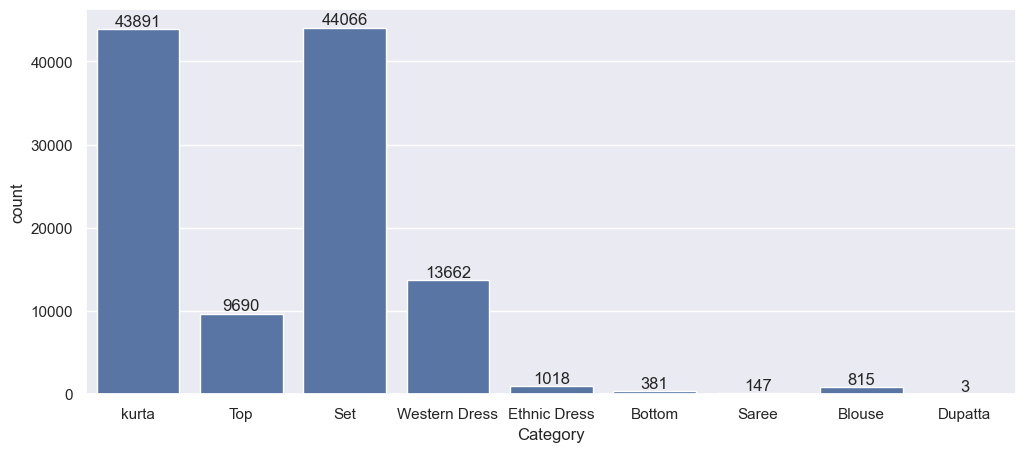

In [31]:
# Category
ax = sns.countplot(x='Category', data=df)
sns.set(rc={'figure.figsize':(15,5)}) #for setting bar width for clearity of names on x axis

#In order to get exact number on the bar graph
for bars in ax.containers:
    ax.bar_label(bars)

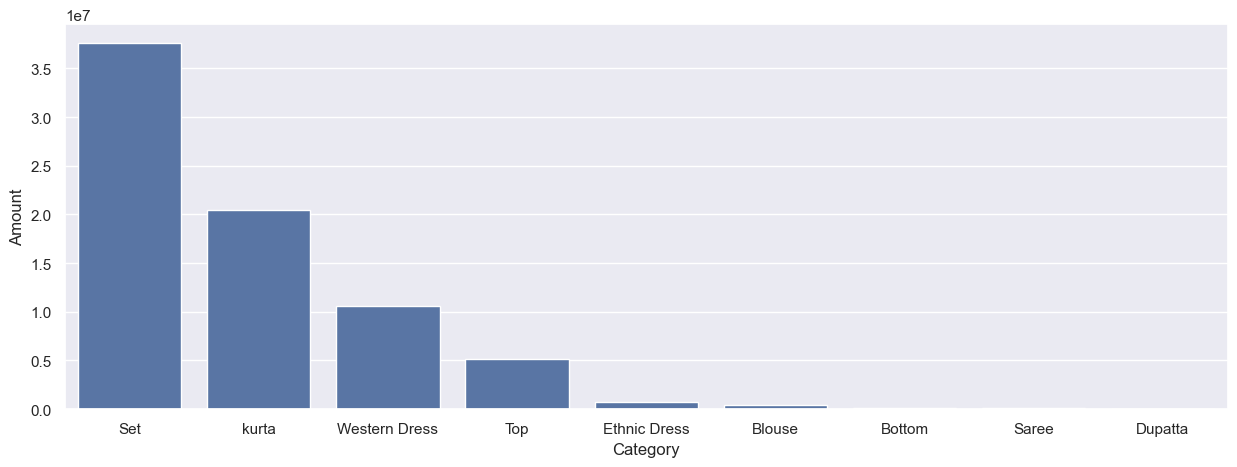

In [32]:
sales_gen = df.groupby(['Category'], as_index=False).sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Category', y = 'Amount', data = sales_gen)
sns.set(rc={'figure.figsize':(15,5)})

In [23]:
#from above graph we can conclude that Set and kurta are the maximum selling dresses.

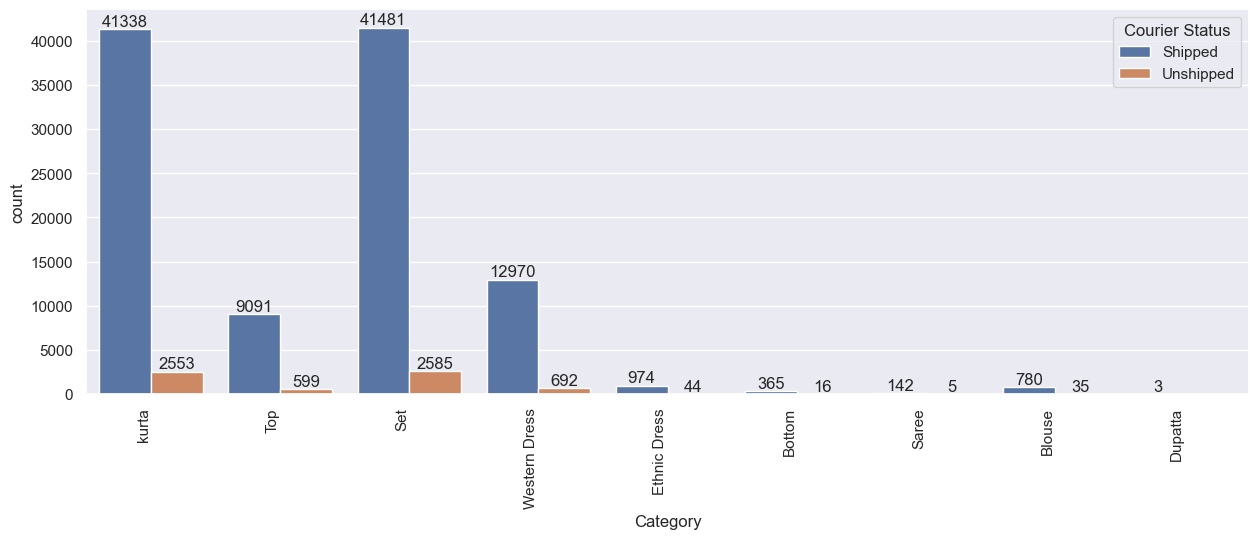

In [36]:
sx=sns.countplot(data=df, x = 'Category', hue = 'Courier Status')
sns.set(rc={'figure.figsize':(15,5)})
plt.xticks(rotation=90, ha='right')
for bars in sx.containers:
    sx.bar_label(bars)

In [73]:
#Maximum commodity that is cancelled are Kurta and Set in numbers. Total cancelled orders are 6497.

In [25]:
#State

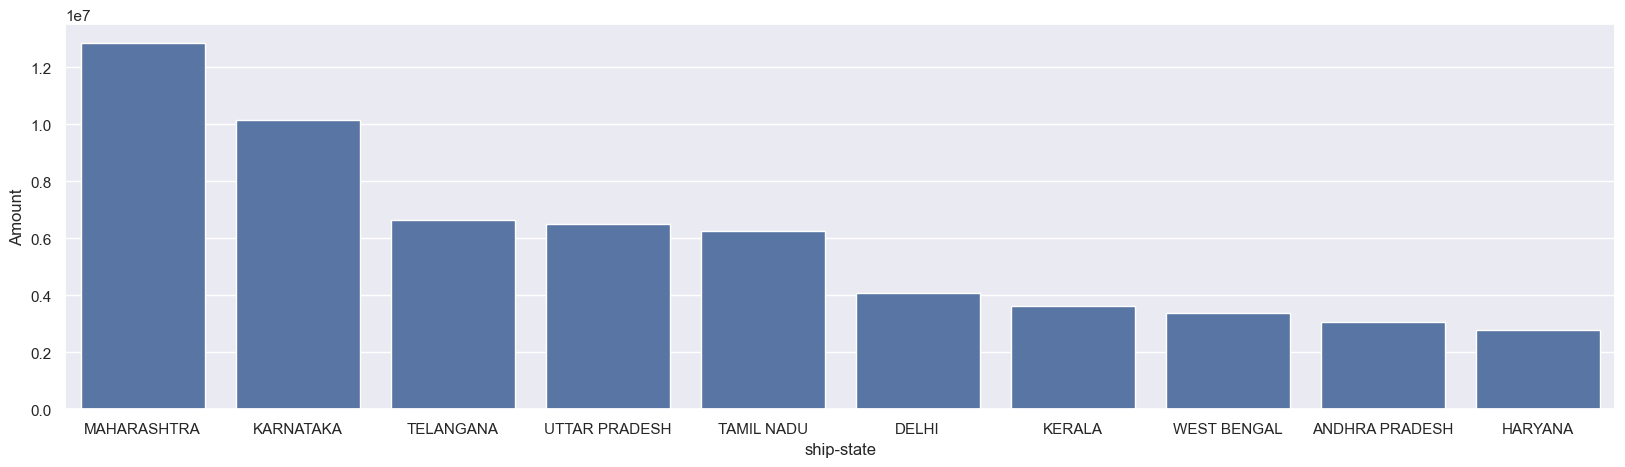

In [52]:
#top 10 states and their amount spent
sales_state = df.groupby(['ship-state'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.barplot(x = 'ship-state', y = 'Amount', data = sales_state)
sns.set(rc={'figure.figsize':(20,5)})

In [74]:
#Largest amount spent by state is Maharastra.

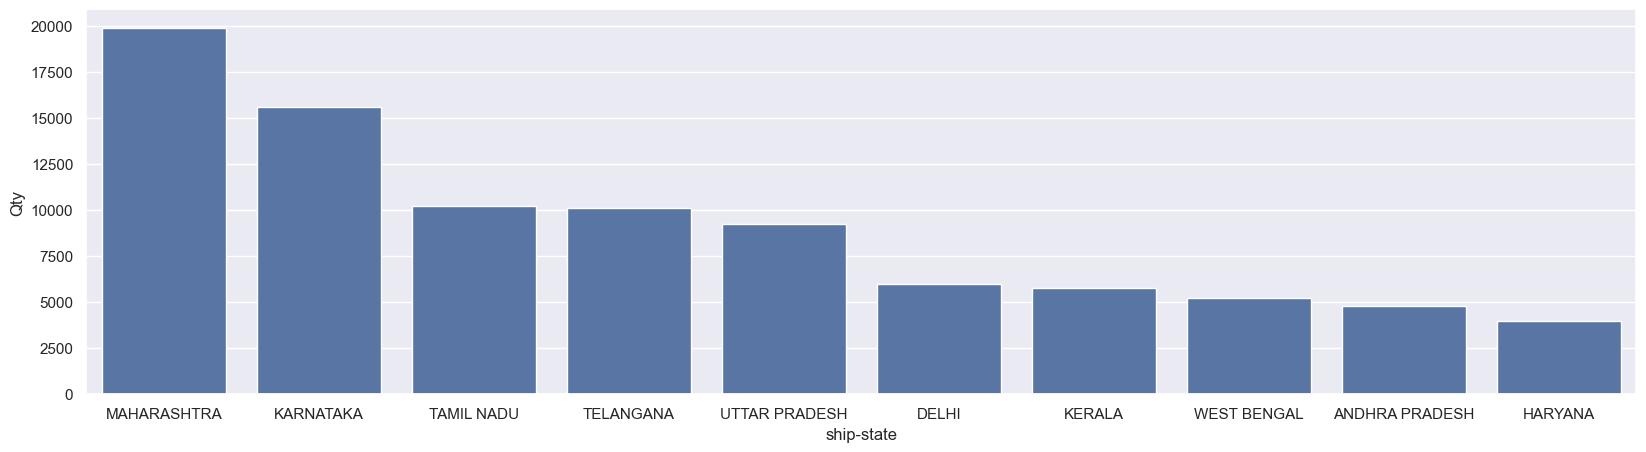

In [54]:
#top 10 states with maximum orders
sales_state = df.groupby(['ship-state'], as_index=False)['Qty'].sum().sort_values(by='Qty', ascending=False).head(10)
sns.barplot(x = 'ship-state', y = 'Qty', data = sales_state)
sns.set(rc={'figure.figsize':(20,5)})

In [75]:
#Comparing Qty vs Ship state, Tamil nadu shifted to num 3rd position and Telangana to 4th when compared with max qty bought per states. Whereas, in Amount spend vs state we know Telangana is at 3rd and Tamil Nadu is at 5th.

<Axes: xlabel='ship-state', ylabel='count'>

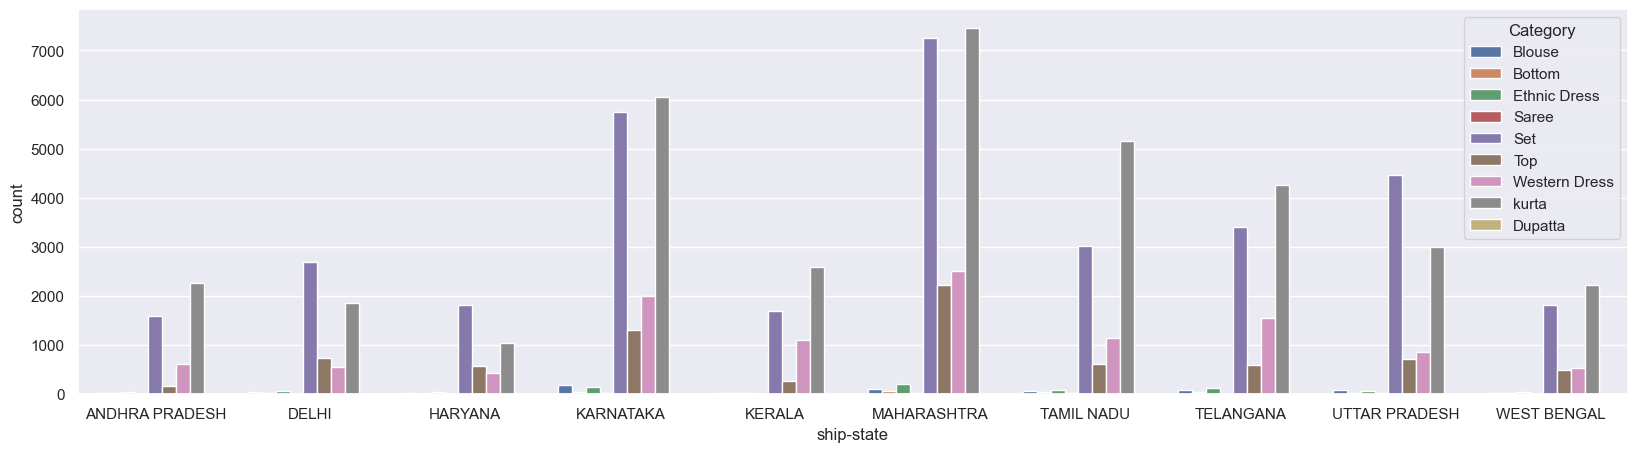

In [64]:
# Group by 'ship-state' and 'Category' and count the number of occurrences
sales_state = df.groupby(['ship-state', 'Category']).size().reset_index(name='count')

# Sort and select the top 10 states based on the count
top_states = sales_state.groupby('ship-state')['count'].sum().nlargest(10).index
sales_state_top10 = sales_state[sales_state['ship-state'].isin(top_states)]

# Set figure size
sns.set(rc={'figure.figsize':(20,5)})

# Create the barplot
sns.barplot(x='ship-state', y='count', hue='Category', data=sales_state_top10)

In [77]:
#From above comparison, we cam say that Kurta are mainly prefered Maharashtra, Andhra Pradesh, Karnataka,Kerala, Tamil nadu, Telangana, & West Bengal.
#And Set are mainly prefered over Kurta in Delhi, Haryana & Uttarpradesh.

Text(0, 0.5, 'Amount')

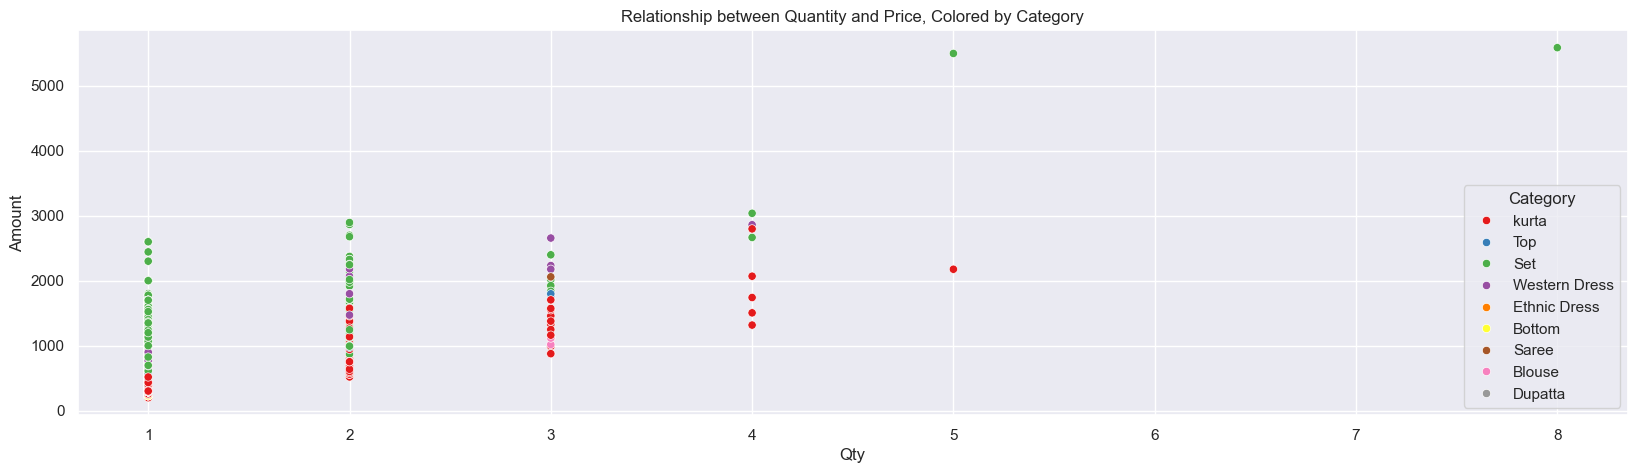

In [78]:
# Create a scatter plot to visualize the relationship between quantity (qty) and price, with category as hue
sns.scatterplot(x='Qty', y='Amount', hue='Category', data=df, palette='Set1')

# Add titles and labels
plt.title('Relationship between Quantity and Price, Colored by Category')
plt.xlabel('Qty')
plt.ylabel('Amount')


In [79]:
# From Above Plot, we can conlude that people bougth Maximum priced Set closed to 3000. and Also maximum qty bought item will be Set which is 8.